### Real estate - group 5
## data analysis and visualaization


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:

#data import from csv file
df = pd.read_csv("real_estate.csv")
df = df.rename(columns={'Unnamed: 1': 'Price', 'Unnamed: 2': 'Rooms' , 'Unnamed: 3': 'Size' , 'Unnamed: 4': 'Livingrooms', 'Unnamed: 5': 'City', 'Unnamed: 6': 'District' , 'Unnamed: 7': 'Type' })
df = df.drop(index=0)
df = df.dropna()
df = df.drop('real_estate', axis=1)
df






,Price,Rooms,Size,Livingrooms,City,District,Type
1,975000,7,200,2,Khamis Mushait,Mukhatat Al-Mousa,villa
2,1550000,7,450,3,Khamis Mushait,Mukhatat Al-Mousa,villa
3,880000,6,300,3,Riyadh,Okaz,villa
4,1250000,6,275,2,Abha,Al-Qurayqer,villa
5,1200000,7,300,3,Riyadh,Al-Hazm,villa
...,...,...,...,...,...,...,...
1559,750000,7,2,300,Khamis Mushait,Mukhatat Al-Mousa,appartment
1560,700000,6,1,360,Khamis Mushait,Mukhatat Al-Mousa,appartment
1561,510000,5,1,200,Jazan,Suez,appartment
1562,550000,5,1,300,Khamis Mushait,Nahda,appartment


### 1. What is the average price of properties in each city?



In [17]:

#convert all numrical data to int64 and float64
for i in range(0, len(df.columns)):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')

#calculate the average for each city
df1=df.groupby(['City'])['Price'].mean().round(5)
df1

<ipython-input-17-f6b3acfcd7a5>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')


City
 Khamis Mushait    6.961173e+05
Abha               1.259615e+06
Abu Arish          1.233333e+06
Ahad Rafidah       2.500000e+06
Al-Haytham         1.200000e+06
Alkharag           1.065000e+06
Badia              3.000000e+05
Buraydah           1.025275e+06
Dammam             1.151401e+06
Dhahran            2.100000e+06
Diriyah            5.750000e+06
Hafr Al-Batin      7.000000e+05
Hail               1.146667e+06
Hofuf              1.220000e+06
Jazan              5.100000e+05
Jeddah             1.215956e+06
Jizan              1.216667e+06
Jubail             1.713636e+06
Khafji             1.050000e+06
Khobar             1.028750e+06
Majmaah            1.105000e+06
Mecca              2.421875e+06
Medina             1.050000e+06
Muhayil            1.010000e+06
Riyadh             2.108353e+06
Sabya              1.366667e+06
Saihat             1.020000e+06
Sayhat             7.700000e+05
Tabuk              9.000000e+05
Taif               1.272000e+06
Unaizah            8.992857e+05
Nam

<Axes: xlabel='City', ylabel='Price'>

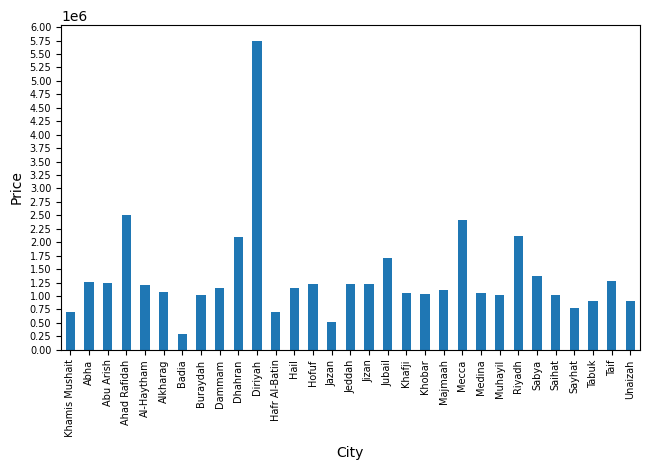

In [34]:
from matplotlib.axis import YAxis
#average visualization

df1.plot.bar()
plt.tick_params(axis='both', which='both', labelsize=7)
plt.locator_params(nbins=30)
plt.tight_layout()
df1.plot.bar(ylabel='Price')



### 2. Is there a correlation between the size of a property and its price?






In [19]:
# correlation between size and price
print(df['Size'].corr(df['Price']))


0.5830827472560078


<ipython-input-26-c79902eccfd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr().round(2)


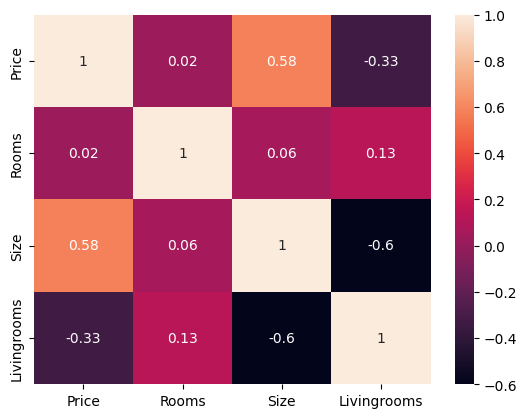

In [26]:
#heat map
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

### 3. What is the most common property type in each city?


In [20]:
df2=df.groupby(['City'])['Type'].agg(pd.Series.mode)
df2

City
 Khamis Mushait    appartment
Abha                    villa
Abu Arish               villa
Ahad Rafidah            villa
Al-Haytham              villa
Alkharag                villa
Badia                   villa
Buraydah                villa
Dammam                  villa
Dhahran                 villa
Diriyah                 villa
Hafr Al-Batin           villa
Hail                    villa
Hofuf                   villa
Jazan              appartment
Jeddah                  villa
Jizan                   villa
Jubail                  villa
Khafji                  villa
Khobar                  villa
Majmaah                 villa
Mecca                   villa
Medina                  villa
Muhayil                 villa
Riyadh                  villa
Sabya                   villa
Saihat                  villa
Sayhat             appartment
Tabuk                   villa
Taif                    villa
Unaizah                 villa
Name: Type, dtype: object

<Axes: xlabel='City', ylabel='no. of villas'>

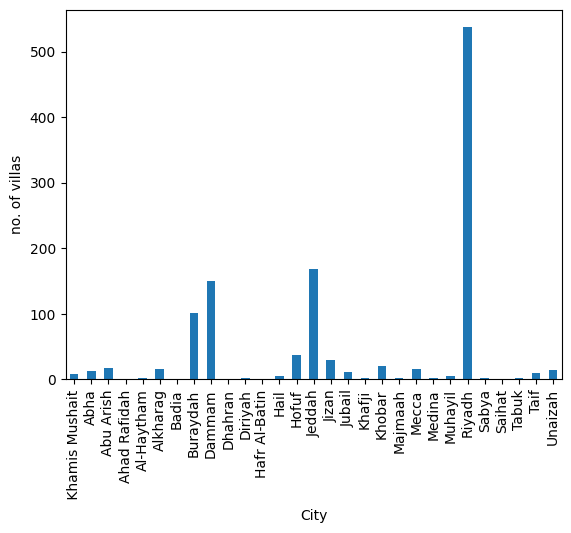

In [57]:
#mode vitualization

#z=df[df['Type'] == 'villa'].count()
df9 = df[df['Type'] == 'villa']
df10 = df[df['Type'] == 'appartment']

df0=df9.groupby(['City'])['Type'].size()
df00=df10.groupby(['City'])['Type'].size()

#1
df0.plot.bar(ylabel='no. of villas')





<Axes: xlabel='City', ylabel='no. of apartments'>

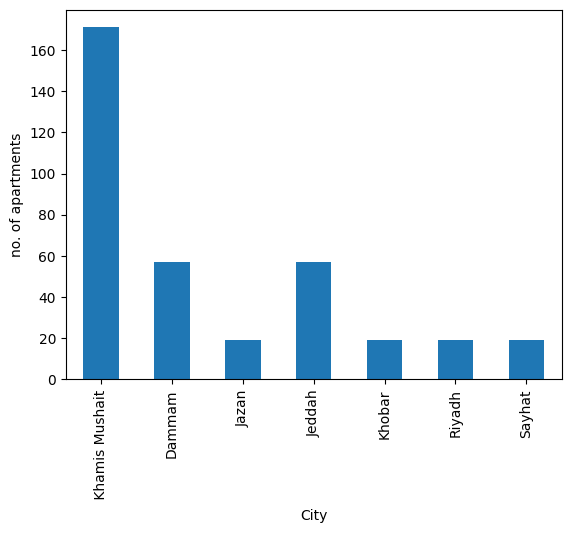

In [22]:
#2
df00.plot.bar(ylabel='no. of apartments')

### 4. How many properties have 4 bedrooms per city?

In [41]:
#all cities
df.groupby(['City','Rooms']).Rooms.value_counts().unstack(fill_value=0).loc[:,4]

#cities with 4 bedroom properites
df22=df.groupby(['City','Rooms']).Rooms.value_counts().loc[:,4]
df22


City      Rooms
Buraydah  4         38
Dammam    4         44
Hail      4          2
Hofuf     4         12
Jeddah    4         24
Jizan     4          1
Khobar    4         20
Riyadh    4        103
Name: Rooms, dtype: int64

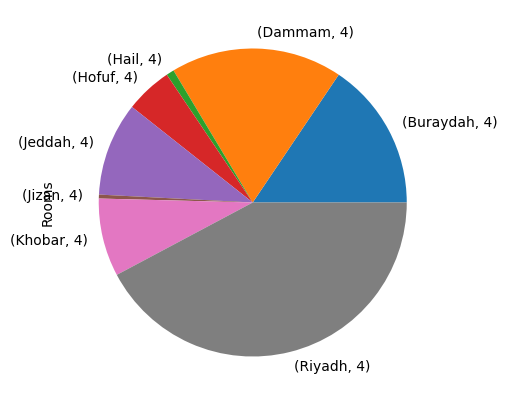

In [45]:
plot = df22.plot.pie(y='mass',figsize=(10, 5))

### 5. What is the most expensive and least expensive district for each property type?

<Axes: xlabel='Type,District'>

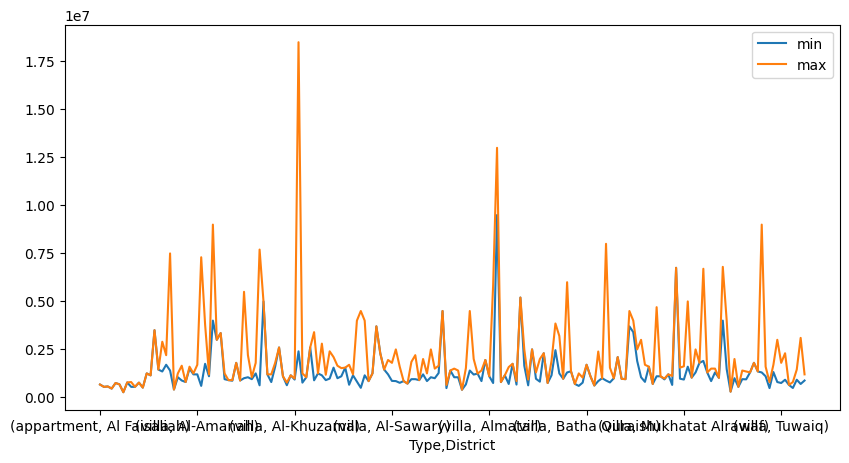

In [66]:
df3 = df.groupby(['Type','District'])['Price'].aggregate(['min','max'])


#scatter plot

df3.plot(figsize=(10, 5))